# Time–Frequency Analysis of EEG Signals
## 1. Introduction
Electroencephalography (EEG) records brain electrical activity over time. EEG signals are **non-stationary** — their frequency content changes over time.
Therefore, simple Fourier Transform (which assumes constant frequencies) cannot capture dynamic brain processes.

Common EEG frequency bands:
| Band | Frequency (Hz) | Associated states |
|-------|----------------|------------------|
| δ (delta) | 0.5–4 | Deep sleep |
| θ (theta) | 4–7 | Memory, drowsiness |
| α (alpha) | 8–13 | Relaxation, closed eyes |
| β (beta) | 13–30 | Active thinking, movement |
| γ (gamma) | 30–100 | Cognitive processing |

Time–Frequency analysis helps to see **what frequencies are active and when**.

## 2. Theory
### 2.1 Fourier Transform (FFT)
$$ X(f) = \int_{-\infty}^{\infty} x(t) e^{-i 2\pi f t} dt $$
Converts signal x(t) into frequency domain X(f).

**Pros:**
- Fast, simple implementation.
- Useful for stationary signals.

**Cons:**
- No information about *when* frequencies occur.

Opening raw data file /Users/ilyamikheev/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


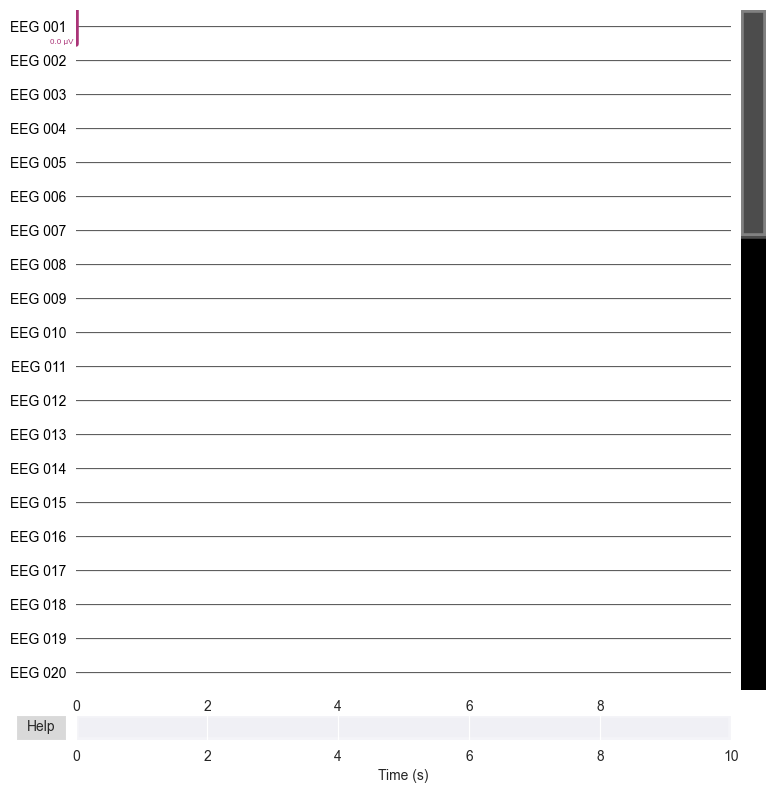

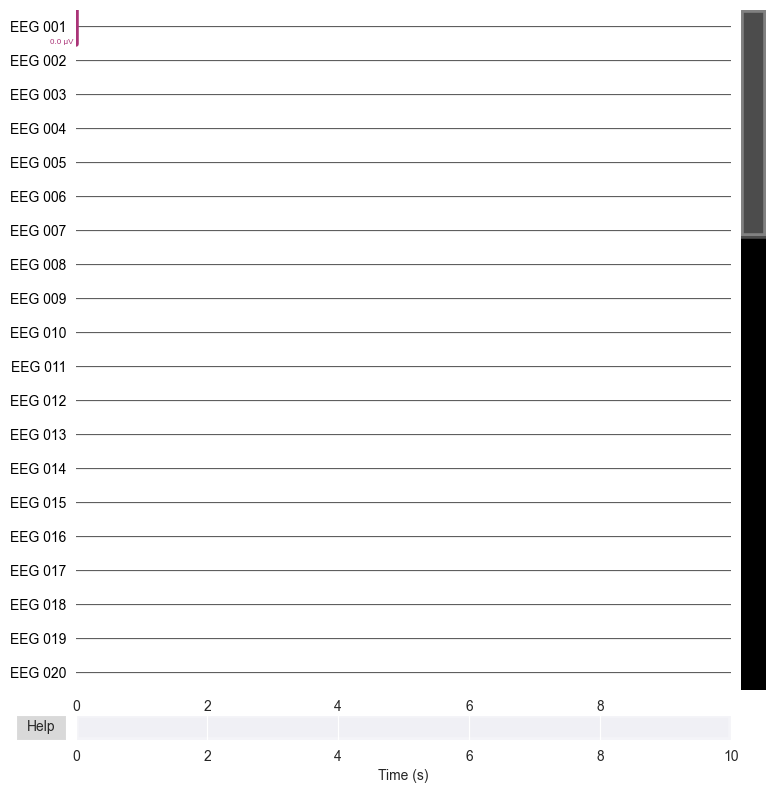

In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from pathlib import Path

# Load sample EEG data
data_path = mne.datasets.sample.data_path()
raw = mne.io.read_raw_fif(Path(data_path) / 'MEG' / 'sample' / 'sample_audvis_raw.fif', preload=True)
raw.pick_types(eeg=True, eog=True)
raw.crop(tmin=30, tmax=40)
raw.plot(title='EEG 10-second segment', scalings='auto')

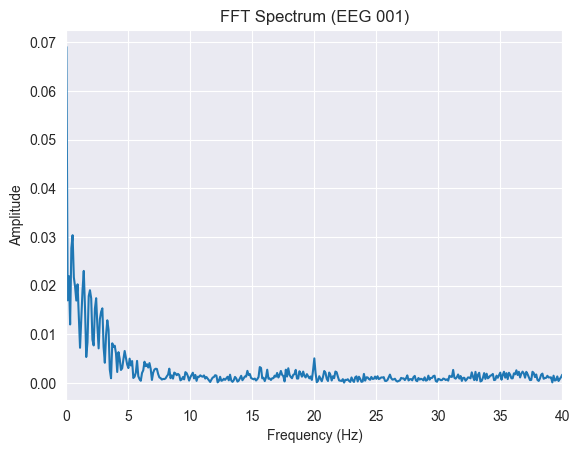

In [5]:
# FFT Example
signal = raw.get_data(picks=['EEG 001'])[0]
fs = raw.info['sfreq']
fft_vals = np.abs(np.fft.rfft(signal))
fft_freq = np.fft.rfftfreq(len(signal), 1/fs)
plt.plot(fft_freq, fft_vals)
plt.title('FFT Spectrum (EEG 001)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 40)
plt.show()

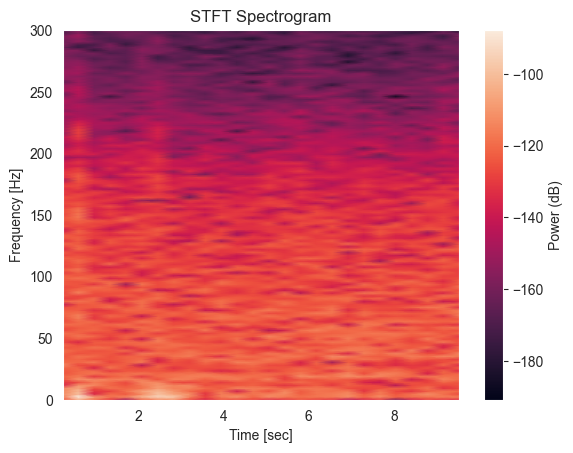

In [6]:
# STFT Example
f, t, Sxx = spectrogram(signal, fs=fs, nperseg=256)
plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('STFT Spectrogram')
plt.colorbar(label='Power (dB)')
plt.show()

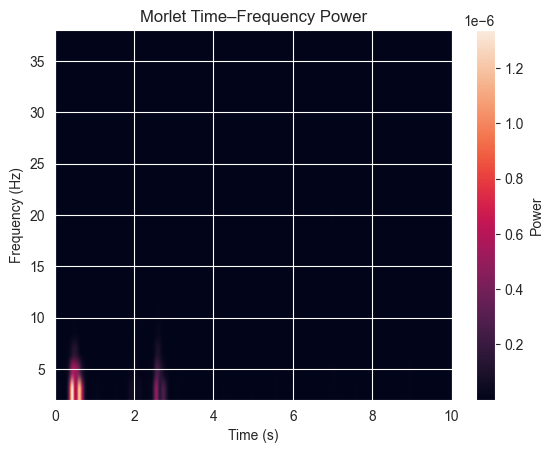

In [7]:
# Morlet Wavelet Example
freqs = np.arange(2, 40, 2)
n_cycles = freqs / 2.0
power = mne.time_frequency.tfr_array_morlet(
    raw.get_data()[np.newaxis, :, :], sfreq=fs, freqs=freqs, n_cycles=n_cycles, output='power')
plt.imshow(power[0, 0, :, :], aspect='auto', origin='lower',
           extent=[0, 10, freqs[0], freqs[-1]])
plt.title('Morlet Time–Frequency Power')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/Users/ilyamikheev/Library/Caches/pypoetry/virtualenvs/bci-classifier-vAvhJyZy-py3.13/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


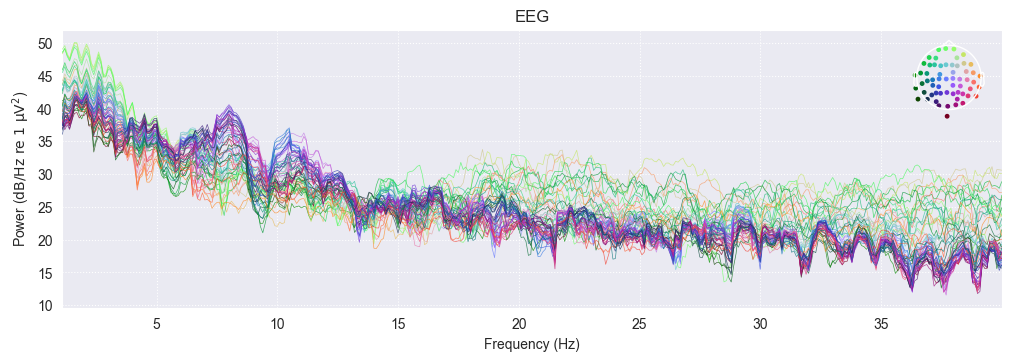

In [10]:
psd = raw.compute_psd(method='multitaper', fmin=1, fmax=40, picks='eeg')
psd.plot()

## 8. Practice Exercises
1. Choose another EEG channel and repeat FFT, STFT, and Wavelet analyses.
2. Identify the dominant frequency band (α, β, etc.) in your chosen channel.
3. Compute α/β power ratio and interpret the result.
4. Compare TFRs between two time intervals (e.g., 0–5 s vs 5–10 s).